In [2]:
#BMEN 415 REGRESSION MODEL: BAYESIAN LINEAR REGRESSION
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
from sklearn.model_selection import train_test_split
import os

data = pd.read_csv("Volumetric_features.csv")
df = data 
df = df.drop(columns=["S.No", "dataset", "Left-WM-hypointensities", "Right-WM-hypointensities", "Left-non-WM-hypointensities", "Right-non-WM-hypointensities"])
 

In [3]:
# Cleaning
df = df.drop_duplicates()
df = df.dropna()
# Split
y = df["Age"]
x = df.loc[:,df.columns!="Age"]

#x=(x-x.mean())/x.std()

x=(x-x.min())/(x.max()-x.min())

In [4]:
#spits train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x.head()


,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1
0,0.266889,0.130439,0.294306,0.517315,0.305780,0.385517,0.316429,0.391351,0.451096,0.243012,...,0.630546,0.646989,0.643852,0.428509,0.619945,0.427838,0.662904,0.646042,0.507961,0.633233
1,0.267356,0.130678,0.297613,0.516960,0.303479,0.407153,0.358349,0.428490,0.426830,0.258800,...,0.658703,0.654144,0.649303,0.433348,0.607774,0.480226,0.609030,0.650336,0.514535,0.637380
2,0.272088,0.140978,0.300899,0.512415,0.385946,0.440772,0.351457,0.326174,0.457948,0.232810,...,0.631399,0.616577,0.623259,0.416190,0.550452,0.498202,0.590559,0.633524,0.512489,0.635653
3,0.285483,0.132802,0.280392,0.482249,0.435433,0.421825,0.319923,0.322751,0.447319,0.242567,...,0.591297,0.620751,0.618413,0.432908,0.557911,0.451977,0.598769,0.612569,0.482089,0.604455
4,0.303644,0.149247,0.334644,0.483584,0.285685,0.387123,0.310561,0.444349,0.500260,0.248801,...,0.616894,0.616577,0.627498,0.395952,0.592854,0.449923,0.534120,0.621520,0.488423,0.631439


In [5]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)

reg.score(x_test, y_test)


0.8512137142542608

In [8]:
#testing score
reg.score(x_train, y_train)*100

85.4504989818832

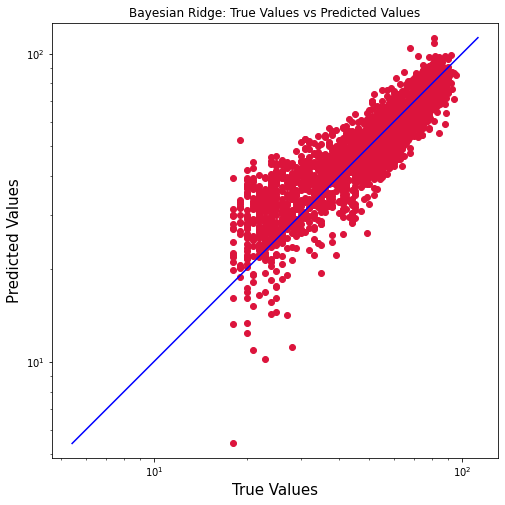

In [9]:
y_pred_train = reg.predict(x_train)

true_val = y_train
pred_val = y_pred_train
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Bayesian Ridge: True Values vs Predicted Values")
plt.axis('equal')
plt.show()

In [11]:
#BMEN 415 REGRESSION MODEL: BAGGING REGRESSOR 
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor(n_estimators=10, random_state=42)
reg.fit(x_train, y_train)

reg.score(x_test, y_test)



0.8623231036738865

In [12]:
#training score
reg.score(x_train, y_train)*100

96.96357192354822

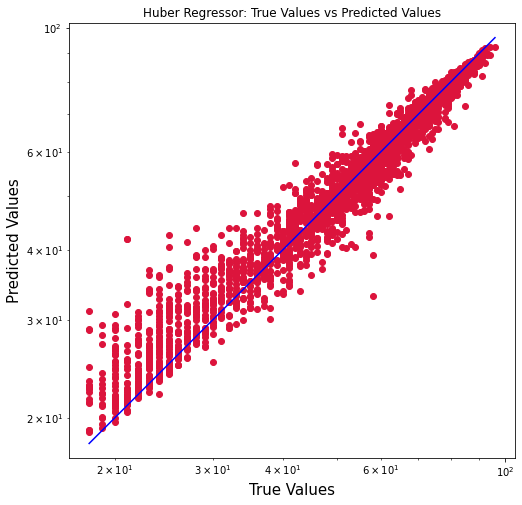

In [27]:
y_pred_train = reg.predict(x_train)

true_val = y_train
pred_val = y_pred_train
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Bagging Regressor: True Values vs Predicted Values")
plt.axis('equal')
plt.show()

In [13]:
#BMEN 415 REGRESSION MODEL: HuberRegressor
from sklearn.linear_model import HuberRegressor, LinearRegression

reg = HuberRegressor().fit(x_train, y_train)

reg.score(x_test,y_test)




c:\Users\14035\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8461719725117547

In [14]:
#training score
reg.score(x_train, y_train)*100

85.02799421289377

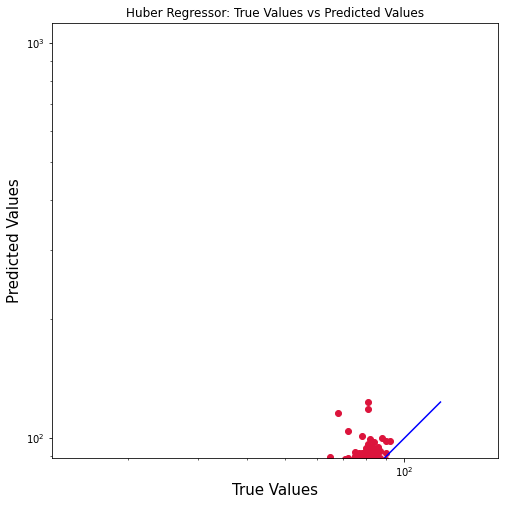

In [25]:

y_pred_train = reg.predict(x_train)

true_val = y_train
pred_val = y_pred_train
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Huber Regressor: True Values vs Predicted Values")
plt.axis('equal')
plt.show()